Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices with linear regression, lasso, random forests and gradient boosting

# Machine learning part

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv('data/train_enc.csv')
df.head(2)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             0             0             0             1                0   

   ...  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  \
0  ...             8           0       2003.0         2.0           0   
1  ...             6           1       1976.0         2.0         298   

   OpenPorchSF  TotalSF  TotalBaths  Age when Sold  SalePrice  
0           61   4276.0         3.5              5     208500  
1            0   3786.0         2.5             31     181500  

[2 rows x 192 columns]

In [45]:
df.shape

(1449, 192)

## Train Test Split

Test split training data and use test_enc.csv as validation.

In [46]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating a Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, r2_score

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm = LinearRegression()
lm.fit(X_train,y_train)
preds_lm = lm.predict(X_test)

### Valuating the model

In [63]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score

In [53]:
print('R-squared', r2_score(y_test, preds_lm)) # accounts for the variation
print('MAE:', metrics.mean_absolute_error(y_test, preds_lm))
print('MSE:', metrics.mean_squared_error(y_test, preds_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_lm))) # directly comparable witht data, $

R-squared 0.8856687215269987
MAE: 17329.58080291628
MSE: 641993752.0681148
RMSE: 25337.59562523869


In [54]:
df['SalePrice'].describe()

count      1449.000000
mean     178281.013112
std       71938.946382
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      213000.000000
max      485000.000000
Name: SalePrice, dtype: float64

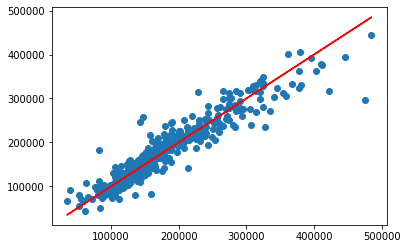

In [76]:
# Our predictions
plt.scatter(y_test, preds_lm)

# Perfect predictions
plt.plot(y_test, y_test,'r')

In [60]:
compare_price_df['Error'] = compare_price_df['Test Y'] - compare_price_df['Predicted']

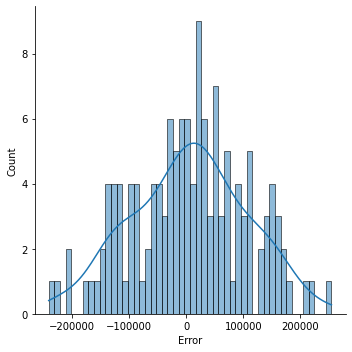

In [61]:
sns.displot(compare_price_df['Error'], bins = 50, kde = True)

#### Predicting on a brand new house
### Predicting on test_enc.csv

In [96]:
test = pd.read_csv('data/test_enc.csv')

In [97]:
single_house = test.iloc[0]

In [ ]:
single_house = single_house.values.reshape((,))

In [ ]:
lm.predict(single_house)

In [ ]:
test.iloc[0]

## output submission.csv file

In [ ]:
output = pd.DataFrame({{'Id': test_id, 'SalePrice': predictions}})
output.head()

In [ ]:
output.to_csv('data/my_submission_1.csv', index=False)
print("Your submission was successfully saved!")

## Saving and Loading a Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict(new_gem)